# Exploratory Data Analysis

# Get necessary packages and Data
Check your data


In [1]:
import re
import string
import spacy
nlp = spacy.load('en_core_web_lg')
import pickle
import pandas as pd
pd.set_option('display.max_rows', 10)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bilgesipal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bilgesipal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Get the Data
with open('../df_data.pkl', "rb") as f:
    df_data = pickle.load(f)
print(len(df_data))

with open('../label.pkl', "rb") as f:
    label = pickle.load(f)

1056


In [3]:
print('type of the data:', type(df_data))
print('size of the data:', len(df_data))

type of the data: <class 'list'>
size of the data: 1056


In [4]:
df_data[:2]

['From: mcovingt@aisun3.ai.uga.edu (Michael Covington)\nSubject: Re: Building a UV flashlight\nNntp-Posting-Host: aisun3.ai.uga.edu\nOrganization: AI Programs, University of Georgia, Athens\nLines: 13\n\nYou can get a *little* UV by putting a heavy UV filter (deep purple) in\nfront of an ordinary flashlight bulb (the brightest you can get).\nMy father used a setup like this in law enforcement work circa 1964.\n\nGood UV ("blacklight") bulbs work like fluorescent bulbs.  I\'d proceed by\ngetting a cheap battery-powered _fluorescent_ light, then going to an\nelectrical supply house and finding a UV bulb that would fit it.\n\n-- \n:-  Michael A. Covington, Associate Research Scientist        :    *****\n:-  Artificial Intelligence Programs      mcovingt@ai.uga.edu :  *********\n:-  The University of Georgia              phone 706 542-0358 :   *  *  *\n:-  Athens, Georgia 30602-7415 U.S.A.     amateur radio N4TMI :  ** *** **  <><\n',
 "From: ah499@cleveland.Freenet.Edu (John Daniels)\nSub

In [ ]:
str(label[0])

In [5]:
label_list = label.tolist()
label = [str(i) for i in label_list]

## Convert the Corpus to a Data Frame

In [7]:
# Create list of dictionaries for each entry
stp_corpus = [{'data': data, 'label': label} for data, label in zip(df_data, label_list)]

# Convert to DataFrame
df = pd.DataFrame(stp_corpus)

df.head()


,data,label
0,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,0
1,From: ah499@cleveland.Freenet.Edu (John Daniel...,0
2,From: steveh@thor.isc-br.com (Steve Hendricks)...,1
3,From: ulan@ee.ualberta.ca (Dale Ulan)\nSubject...,0
4,From: zippy@hairball.ecst.csuchico.edu (The Pi...,1


In [8]:
data = df['data'].iloc[0]
data

'From: mcovingt@aisun3.ai.uga.edu (Michael Covington)\nSubject: Re: Building a UV flashlight\nNntp-Posting-Host: aisun3.ai.uga.edu\nOrganization: AI Programs, University of Georgia, Athens\nLines: 13\n\nYou can get a *little* UV by putting a heavy UV filter (deep purple) in\nfront of an ordinary flashlight bulb (the brightest you can get).\nMy father used a setup like this in law enforcement work circa 1964.\n\nGood UV ("blacklight") bulbs work like fluorescent bulbs.  I\'d proceed by\ngetting a cheap battery-powered _fluorescent_ light, then going to an\nelectrical supply house and finding a UV bulb that would fit it.\n\n-- \n:-  Michael A. Covington, Associate Research Scientist        :    *****\n:-  Artificial Intelligence Programs      mcovingt@ai.uga.edu :  *********\n:-  The University of Georgia              phone 706 542-0358 :   *  *  *\n:-  Athens, Georgia 30602-7415 U.S.A.     amateur radio N4TMI :  ** *** **  <><\n'

# Clean the Data

Text data cleaning, also known as text pre-processing, is essential for improving model performance. Since text cleaning can be an endless process, we will start simple and refining iteratively.
Basic Cleaning Steps:

    Convert text to lowercase
    Remove punctuation and numbers
    Eliminate non-sensical text (e.g., \n)
    Tokenize text
    Remove stop words

Advanced Cleaning After Tokenization:

    Stemming/Lemmatization
    POS tagging
    Bigram/Trigram creation
    Handling typos

More refinements can be applied later to enhance results.




## Examples --> Playground

In [10]:
import re

# Original text
text = """From: bil@okcforum.osrhe.edu (Bill Conner)\nSubject: Re: Not the Omni!\nNntp-Posting-Host: okcforum.osrhe.edu\nOrganization: Okcforum Unix Users Group\nX-Newsreader: TIN [version 1.1 PL6]\nLines: 18\n\nCharley Wingate (mangoe@cs.umd.edu) wrote:\n: \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.\n\nBill\n"""

#  Remove email headers
cleaned_text = re.sub(r"^(From|Subject|Nntp-Posting-Host|Organization|X-Newsreader|Lines):.*\n?", "", text, flags=re.MULTILINE)

# Remove email addresses
cleaned_text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", "", cleaned_text)

 #  Remove all < and > characters
cleaned_text = re.sub(r"[<>]", "", cleaned_text)

 # Remove extra colons and quote symbols (:, >)
cleaned_text = re.sub(r"^[:>\s]+", "", cleaned_text, flags=re.MULTILINE)


# Remove all newlines and replace with a space
#This line of code removes extra newlines (\n) and replaces them with a single space while also trimming any leading or trailing spaces.
cleaned_text = re.sub(r"\n+", " ", cleaned_text).strip()


In [11]:
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(cleaned_text)
cleaned_text = ' '.join(tokens)
# Display cleaned text
print(cleaned_text)

Charley Wingate wrote Please enlighten me How is omnipotence contradictory By definition all that can occur in the universe is governed by the rules of nature Thus god cannot break them Anything that god does must be allowed in the rules somewhere Therefore omnipotence CANNOT exist It contradicts the rules of nature Obviously an omnipotent god can change the rules When you say By definition what exactly is being defined certainly not omnipotence You seem to be saying that the rules of nature are pre existant somehow that they not only define nature but actually cause it If that s what you mean I d like to hear your further thoughts on the question Bill


In [13]:
doc = nlp(cleaned_text)

In [14]:

# Extract lemmatized text (excluding stopwords and punctuation)
lemmatized_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Display cleaned, lemmatized, and stopword-removed text
print(lemmatized_text)

Charley Wingate write enlighten omnipotence contradictory definition occur universe govern rule nature god break god allow rule omnipotence exist contradict rule nature obviously omnipotent god change rule definition exactly define certainly omnipotence say rule nature pre existant define nature actually cause s mean d like hear thought question Bill


In [15]:
type(lemmatized_text)

str

In [ ]:
# # Pickle files for later use

#     with open("data.txt", "wb") as file:
#         pickle.dump(transcripts[i], file)

## The Cleaner Functions

In [16]:
def clean_text(text):
    """
    Cleans the input text by performing various preprocessing steps:

    1. **Removes Metadata Headers**: Deletes lines that start with
       'From', 'Subject', 'Nntp-Posting-Host', 'Organization',
       'X-Newsreader', or 'Lines'.
    2. **Removes Email Addresses**: Matches and removes any email-like patterns.
    3. **Removes Quotation Symbols and Leading Spaces**: Removes `:` and `>`
       characters at the beginning of lines.
    4. **Removes Digits**: Eliminates all numeric characters.
    5. **Removes Extra Newlines**: Replaces multiple newlines with a single space.
    6. **Removes Angle Brackets (`< >`)**: Deletes any occurrences of `<` and `>`.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text with unwanted elements removed.
    """
    cleaned_text = re.sub(r"^(From|Subject|Nntp-Posting-Host|Organization|X-Newsreader|Lines):.*\n?", "", text, flags=re.MULTILINE)
    cleaned_text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", "", cleaned_text)
    cleaned_text = re.sub(r"^[:>\s]+", "", cleaned_text, flags=re.MULTILINE)
    cleaned_text = re.sub(r"\d+", "", cleaned_text)
    cleaned_text = re.sub(r"\n+", " ", cleaned_text).strip()
    cleaned_text = re.sub(r"[<>]", "", cleaned_text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(cleaned_text)
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [17]:
def lemmatizer(cleaned_text):
    """
    Applies lemmatization to the input text using SpaCy, while also removing stop words and punctuation.

    Steps:
    1. **Tokenizes** the input text using a SpaCy NLP model.
    2. **Lemmatizes** each token (converts words to their base form).
    3. **Removes Stop Words** (e.g., "the", "is") to retain only meaningful words.
    4. **Removes Punctuation** to clean the text further.
    5. **Joins the lemmatized words** back into a single string.

    Args:
        cleaned_text (str): The input text that has already been preprocessed.

    Returns:
        str: The lemmatized text with stop words and punctuation removed.

    Example:
        import spacy
        nlp = spacy.load("en_core_web_sm")
        cleaned_text = "The dogs are running quickly towards the park."
        print(lemmatizer(cleaned_text))
        'dog run quickly park'
    """

    doc = nlp(cleaned_text)
    lemmatized_text = " ".join([str(token.lemma_) for token in doc if not token.is_stop and not token.is_punct])

    return lemmatized_text

In [18]:
df.head()

,data,label
0,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,0
1,From: ah499@cleveland.Freenet.Edu (John Daniel...,0
2,From: steveh@thor.isc-br.com (Steve Hendricks)...,1
3,From: ulan@ee.ualberta.ca (Dale Ulan)\nSubject...,0
4,From: zippy@hairball.ecst.csuchico.edu (The Pi...,1


In [19]:
df['clean_text'] = df['data'].apply(lambda x: clean_text(x))

In [20]:
df.clean_text.iloc[2]

'Summary Response to Paul Schmidt In article Paul Schmidt writes Steve Hendricks writes As noted in another thread Limiting govt the problem libertarians face is insuring that the limited government they seek does not become the tool of private interests to pursue their own agenda Believe it or not we liberals are frequently as opposed to anti competitive measures as you conservatives We don t believe however that competition will necessarily be protected by the actions of business interests in a free market After all in the example you cite it was not liberals that pressed for such regulations but good staunch conservative businessmen As Adam Smith so eloquently demonstrated the free market is not something that capitalists seek to protect when they can profit from its elimination The same point was made by Marx a point of agreement between the two theorists that should tell us something I do not want the government to become a tool of private interests Limited government cannot insur

In [21]:
df['new_data'] = df.clean_text.apply(lambda x: lemmatizer(x))

In [22]:
with open("../clean_df.pkl", "wb") as file:
    pickle.dump(df[:100], file)

In [ ]:
with open("../clean_df.pkl", "rb") as file:
    df = pickle.load(file)

## Visualise --EDA

### WORD CLOUDS

A Word Cloud (also called a tag cloud) is a visual representation of text data, where:

    More frequent words appear larger, while
    Less frequent words appear smaller

It is commonly used in NLP and text analysis to identify important words in a dataset.
Example Use Cases

    Analyzing customer reviews (e.g., finding common themes in feedback)
    Summarizing large text data (e.g., extracting key terms from news articles)
    Exploring social media trends (e.g., identifying frequently used words in tweets)

In [23]:
with open("../clean_df.pkl", "rb") as file:
    data_clean = pickle.load(file)

In [24]:
data_clean.head()

,data,label,clean_text,new_data
0,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,0,You can get a little UV by putting a heavy UV ...,little uv put heavy uv filter deep purple ordi...
1,From: ah499@cleveland.Freenet.Edu (John Daniel...,0,NNTP Posting Host slc ins cwru edu I recently ...,NNTP posting host slc in cwru edu recently buy...
2,From: steveh@thor.isc-br.com (Steve Hendricks)...,1,Summary Response to Paul Schmidt In article Pa...,Summary Response Paul Schmidt article Paul Sch...
3,From: ulan@ee.ualberta.ca (Dale Ulan)\nSubject...,0,writes Greetings Situation I have a phone jack...,write Greetings Situation phone jack mount wal...
4,From: zippy@hairball.ecst.csuchico.edu (The Pi...,1,NNTP Posting Host hairball ecst csuchico edu I...,NNTP posting Host hairball ecst csuchico edu r...


In [25]:
data_clean.label.value_counts()

label
0    57
1    43
Name: count, dtype: int64

In [26]:
grouped_df = data_clean.groupby('label')['new_data'].agg(' '.join).reset_index().copy()
grouped_df

,label,new_data
0,0,little uv put heavy uv filter deep purple ordi...
1,1,Summary Response Paul Schmidt article Paul Sch...


In [27]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

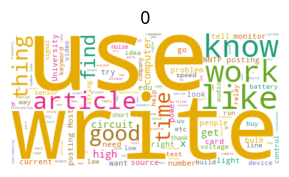

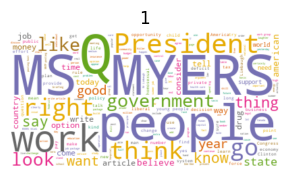

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['0', '1']

# Create subplots for each comedian
for i in range(2):
    wc.generate(grouped_df.new_data.iloc[i])


    plt.subplot(3, 4, 2+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[i])
    plt.show()

## Create document X term matrix and Do Further Analysis

In [29]:
# Let's create our document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
df.head()

,data,label,clean_text,new_data
0,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,0,You can get a little UV by putting a heavy UV ...,little uv put heavy uv filter deep purple ordi...
1,From: ah499@cleveland.Freenet.Edu (John Daniel...,0,NNTP Posting Host slc ins cwru edu I recently ...,NNTP posting host slc in cwru edu recently buy...
2,From: steveh@thor.isc-br.com (Steve Hendricks)...,1,Summary Response to Paul Schmidt In article Pa...,Summary Response Paul Schmidt article Paul Sch...
3,From: ulan@ee.ualberta.ca (Dale Ulan)\nSubject...,0,writes Greetings Situation I have a phone jack...,write Greetings Situation phone jack mount wal...
4,From: zippy@hairball.ecst.csuchico.edu (The Pi...,1,NNTP Posting Host hairball ecst csuchico edu I...,NNTP posting Host hairball ecst csuchico edu r...


In [31]:
grouped_df = df.groupby('label')['new_data'].agg(' '.join).reset_index().copy()
grouped_df.head()

,label,new_data
0,0,little uv put heavy uv filter deep purple ordi...
1,1,Summary Response Paul Schmidt article Paul Sch...


In [32]:
# Recreate document-term matrix
cv = CountVectorizer()
data_cv = cv.fit_transform(grouped_df.new_data)



In [36]:
data_new = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_new.index = data_new.index


In [37]:
data_new.head()

,aa,aaa,aaaaaaaaaaaa,aaahh,aalternate,aammmaaaazzzzzziinnnnggggg,aaron,aart_olsen,ab,abandon,...,zlttg,zone,zoo,zooid,zoology,ztimer,zucchini,zumwalt,³ation,ýé
0,5,2,0,1,1,0,12,1,6,3,...,1,1,0,0,8,1,1,0,3,3
1,13,1,1,0,0,2,3,0,3,5,...,0,8,1,1,0,0,0,1,0,0


In [35]:
data_new.columns[:10]

Index(['aa', 'aaa', 'aaaaaaaaaaaa', 'aaahh', 'aalternate',
       'aammmaaaazzzzzziinnnnggggg', 'aaron', 'aart_olsen', 'ab', 'abandon'],
      dtype='object')

In [38]:
data = data_new.transpose()
data.head()


,0,1
aa,5,13
aaa,2,1
aaaaaaaaaaaa,0,1
aaahh,1,0
aalternate,1,0


In [39]:
# Find the top 10 words in each topic
top_dict = {}
for c in data:
    top = data[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('use', np.int64(406)),
  ('write', np.int64(373)),
  ('ground', np.int64(303)),
  ('article', np.int64(294)),
  ('like', np.int64(276)),
  ('know', np.int64(275)),
  ('wire', np.int64(272)),
  ('work', np.int64(268)),
  ('circuit', np.int64(254)),
  ('don', np.int64(248)),
  ('good', np.int64(248)),
  ('power', np.int64(235)),
  ('need', np.int64(216)),
  ('look', np.int64(195)),
  ('want', np.int64(189)),
  ('current', np.int64(175)),
  ('line', np.int64(175)),
  ('time', np.int64(174)),
  ('high', np.int64(169)),
  ('run', np.int64(162)),
  ('thing', np.int64(152)),
  ('host', np.int64(150)),
  ('ve', np.int64(147)),
  ('chip', np.int64(147)),
  ('try', np.int64(143)),
  ('thank', np.int64(142)),
  ('distribution', np.int64(140)),
  ('get', np.int64(138)),
  ('find', np.int64(136)),
  ('low', np.int64(135)),
  ('box', np.int64(133)),
  ('go', np.int64(133)),
  ('outlet', np.int64(131)),
  ('posting', np.int64(131)),
  ('amp', np.int64(131)),
  ('way', np.int64(129)),
  ('nntp',

In [40]:
# Print the top 10 words per topic
for topic, top_words in top_dict.items():
    print(topic)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

0
use, write, ground, article, like, know, wire, work, circuit, don
---
1
people, write, article, think, don, president, government, mr, know, say
---


In [41]:
top_dict

{0: [('use', np.int64(406)),
  ('write', np.int64(373)),
  ('ground', np.int64(303)),
  ('article', np.int64(294)),
  ('like', np.int64(276)),
  ('know', np.int64(275)),
  ('wire', np.int64(272)),
  ('work', np.int64(268)),
  ('circuit', np.int64(254)),
  ('don', np.int64(248)),
  ('good', np.int64(248)),
  ('power', np.int64(235)),
  ('need', np.int64(216)),
  ('look', np.int64(195)),
  ('want', np.int64(189)),
  ('current', np.int64(175)),
  ('line', np.int64(175)),
  ('time', np.int64(174)),
  ('high', np.int64(169)),
  ('run', np.int64(162)),
  ('thing', np.int64(152)),
  ('host', np.int64(150)),
  ('ve', np.int64(147)),
  ('chip', np.int64(147)),
  ('try', np.int64(143)),
  ('thank', np.int64(142)),
  ('distribution', np.int64(140)),
  ('get', np.int64(138)),
  ('find', np.int64(136)),
  ('low', np.int64(135)),
  ('box', np.int64(133)),
  ('go', np.int64(133)),
  ('outlet', np.int64(131)),
  ('posting', np.int64(131)),
  ('amp', np.int64(131)),
  ('way', np.int64(129)),
  ('nntp',

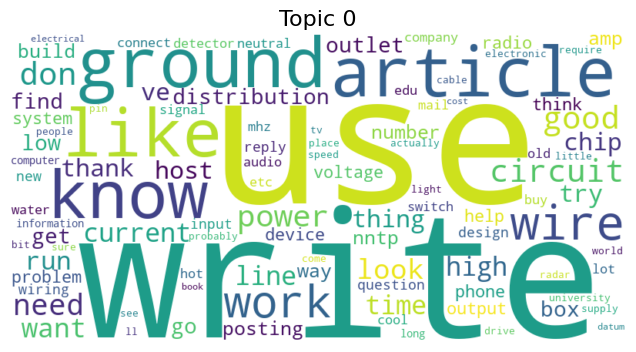

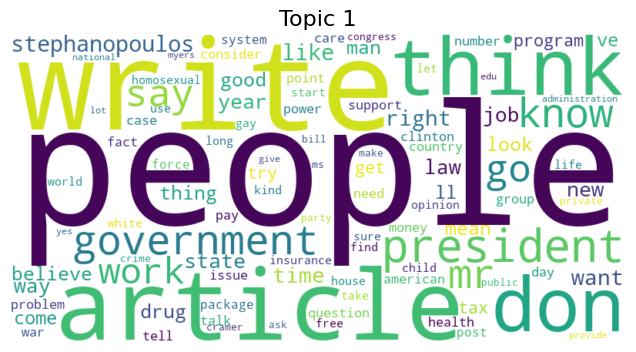

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic, words in top_dict.items():
    # Convert list of tuples to dict for WordCloud
    freq_dict = {word: int(freq) for word, freq in words}

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        prefer_horizontal=1.0
    ).generate_from_frequencies(freq_dict)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic}", fontsize=16)
    plt.show()

In [43]:
# Find the number of unique words that each topic has
full_names = []
for topic in data.columns:
    full_names.append(topic)

In [44]:

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for topic in data.columns:
    uniques = data[topic].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [45]:
unique_list

[7525, 9299]

In [46]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['topic', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,topic,unique_words
0,0,7525
1,1,9299


In [47]:
# Calculate the words per mail of each topic

# Find the total number of words that topic has
total_list = []
for topic in data.columns:
    totals = sum(data[topic])
    total_list.append(totals)

#
mails = [46, 54]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['mail_number'] = mails
data_words['words_per_mail'] = data_words['total_words'] / data_words['mail_number']

# Sort the dataframe by words per mail, to see which mails are more verbose
data_wpm_sort = data_words.sort_values(by='words_per_mail')
data_wpm_sort

,topic,unique_words,total_words,mail_number,words_per_mail
0,0,7525,53161,46,1155.673913
1,1,9299,87936,54,1628.444444
